In [2]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_iter1 = b0.b0()
#filename_to_import_csv_data_from = r'./data/240731/newinit_norings_240812_bvals_shifted.csv'
filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'

b0map_iter1.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
b0map_iter1.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet



No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240719/Thursday_ball_R120_12pts,,,,,,
 not used. path data taken from csv!
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [-1.49212153e-03  2.23818229e-03 -3.57200575e+00]
ROTATING THE MAGNET NOW!
len(path.r)= 11487
len(b0Data)= 11487
-111.4292539392357  < x <  111.4307460607643
-116.42575607208153  < y <  115.00424392791848
-115.00349786715418  < z <  107.85650213284583
[8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.570000000000022, 8.57000000000005, 8.57000000000005, 8.570000000000022, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993, 8.569999999999993,

In [3]:

# spherical decomposition
diameter_of_sphere = b0map_iter1.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_iter1.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_iter1.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


239.91103289828555
(27, 28, 27)
Mean field strength in 23 cm sphere: -47.55 mT
Inhomogeneity in 23 cm sphere: -5783 ppm
Inhomogeneity of fit: 5679 ppm
Error: -1552 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 5384 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


-47.553340178017265
-47.70164423265073 -47.445624597333996


<Figure size 640x480 with 0 Axes>

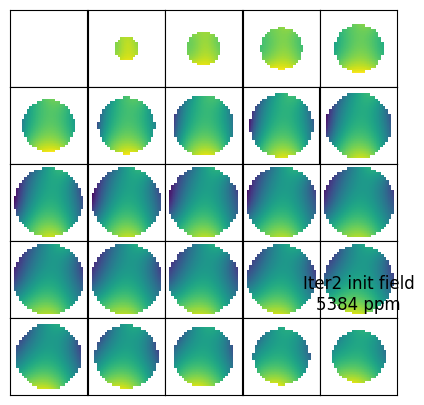

In [4]:
# initial field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_iter1.xDim_SPH_fine
FieldMeasured = b0map_iter1.interpolatedField
mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(FieldMeasured))

print(np.nanmin(FieldMeasured),np.nanmax(FieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(FieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
initHomo = abs((np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured))*1e6
plt.title('Iter2 init field\n%.0f ppm'%initHomo)

plt.savefig('./pics/iter2_init_field.png',format="png")
plt.savefig('./pics/iter2_init_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [4]:

#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [5]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
STRENGTH_FACTOR = 1.25
STRENGTH_FACTOR_1 = 1.05
NEW_B_REM = 1.35*STRENGTH_FACTOR*STRENGTH_FACTOR_1#
bRem                = NEW_B_REM # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 260*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [1]#[-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[4.5]


In [6]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            #if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                #if ringPosition == ringPositions[0]:
                    #position[0] = -0.07 #!!!!! TEMP!!!!!
                    #position[2] -=0.03 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


let us position some magnets on a circumference of a R=260 mm YZ circle with X=0
84
0.0045 0.25634002592118954 -0.04347172771726347
0.0045 0.25837121755087095 -0.029057080742575094
0.0045 0.2595924850253051 -0.01455134764847503
0.0045 0.26 0.0
0.0045 0.2595924850253051 0.014551347648475035
0.0045 0.25837121755087095 0.029057080742575105
0.0045 0.25634002592118954 0.04347172771726347
0.0045 0.24373283831314335 0.09052239241104448
0.0045 0.23828457837705758 0.10402143869254984
0.0045 0.23208936048768317 0.11719440578977419
0.0045 0.22516660498395408 0.12999999999999998
0.0045 0.21753801283920812 0.14239807923553086
0.0045 0.2092274976344825 0.1543497788583211
0.0045 0.20026111059587987 0.16581763351014503
0.0045 0.16581763351014503 0.20026111059587987
0.0045 0.1543497788583211 0.2092274976344825
0.0045 0.14239807923553086 0.21753801283920812
0.0045 0.13000000000000003 0.22516660498395405
0.0045 0.11719440578977419 0.23208936048768317
0.0045 0.10402143869254979 0.2382845783770576
0.0045 0

magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  30
computing field of one shim magnet at  0.0045 0.25634002592118954 -0.04347172771726347
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  30
computing field of one shim magnet at  0.0045 0.25837121755087095 -0.029057080742575094
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 2.32047907e-08 0.00000000e+00]
x vector length in single magnet simulation:  30
computing field of one shim magnet at  0.0045 0.2595924850253051 -0.01455134764847503
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.0

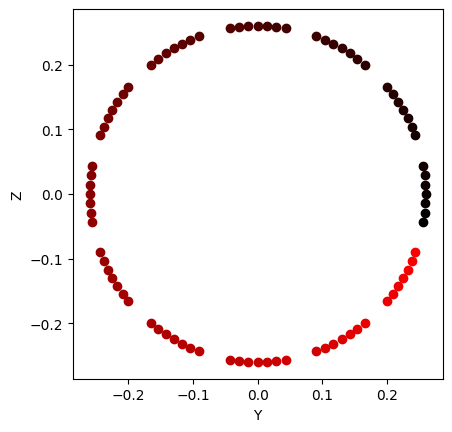

In [7]:

import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])

axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_iter1.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_iter1.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_iter1.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = NEW_B_REM # T
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3

print(DSV)


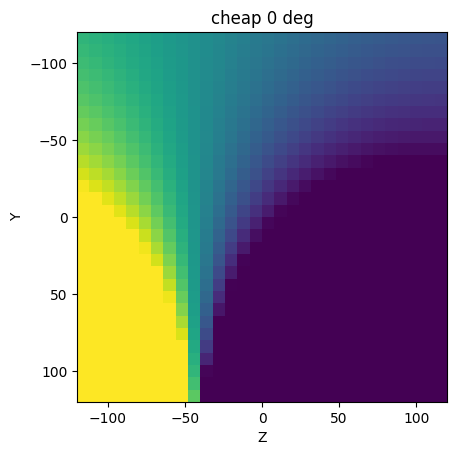

[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]


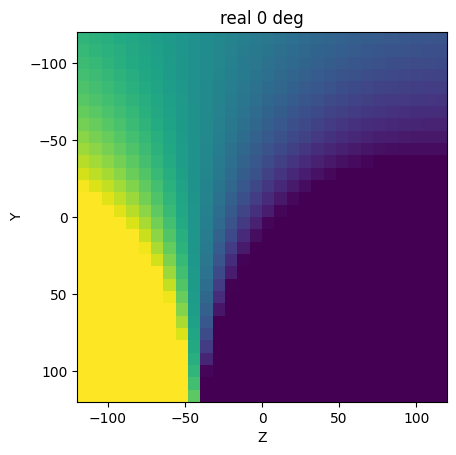

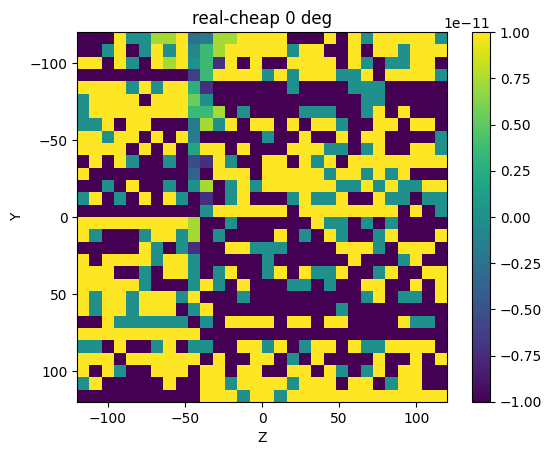

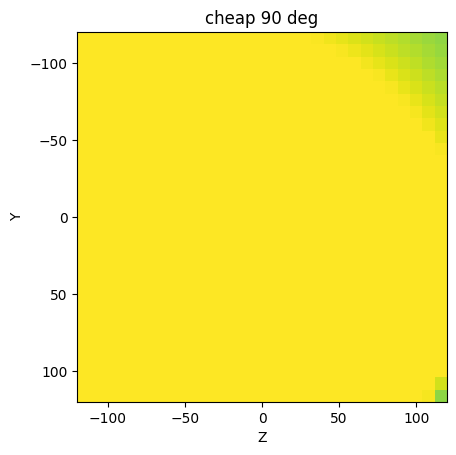

[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]


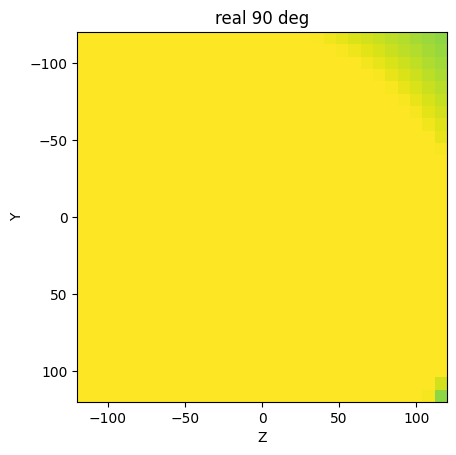

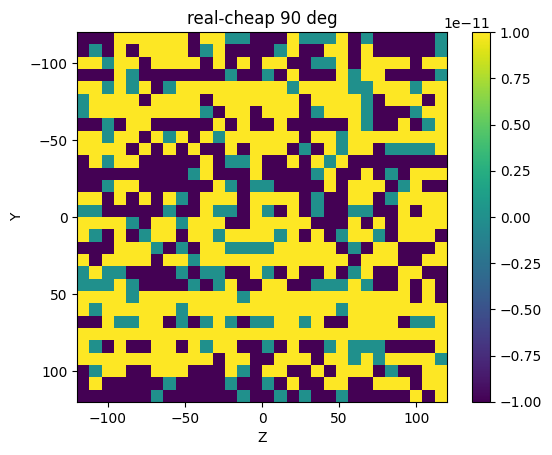

In [8]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_iter1.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/4
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()
    
    # DIFF
    plt.imshow(1e3*(magnet.B0[12,:,:,2])-cheapfield,vmin=-1e-11, vmax=1e-11,extent=[-v,v,v,-v])
    plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.00000000e+00]
[0.00000000e+00 3.04562878e-08 0.00000000e+00]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 3.04562878e-08 0.000000

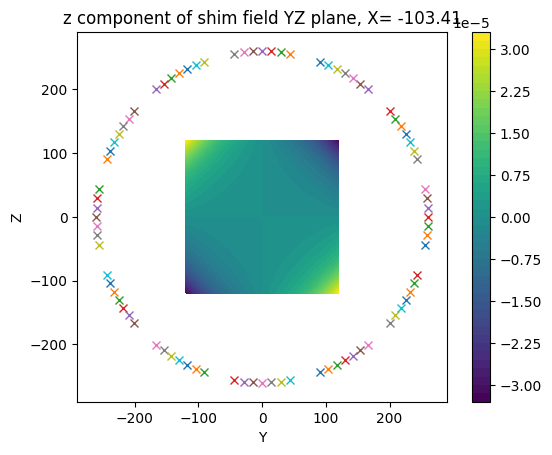

In [9]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_iter1.xDim_SPH_fine*1e0
Y = b0map_iter1.yDim_SPH_fine*1e0
Z = b0map_iter1.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = 0#+np.pi/2

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 2
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [10]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    print(magnet.position)
    alpha =np.pi/2#!TEMP-np.pi/2
    magnet.bRem = NEW_B_REM # T #!!! IMPORTANT !!!
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    MagnetsField_simulated += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter1.sphere_mask
MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


[0.0045, 0.25634002592118954, -0.04347172771726347]
[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]
[0.0045, 0.25837121755087095, -0.029057080742575094]
[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]
[0.0045, 0.2595924850253051, -0.01455134764847503]
[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]
[0.0045, 0.26, 0.0]
[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]
[0.0045, 0.2595924850253051, 0.014551347648475035]
[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]
[0.0045, 0.25837121755087095, 0.029057080742575105]
[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e

30


<Figure size 640x480 with 0 Axes>

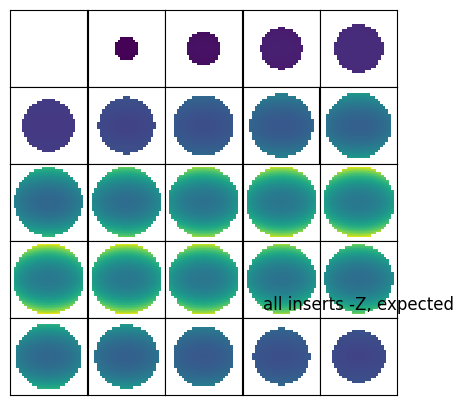

In [11]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        #xxx = axes[j,i].imshow(oneMagnetField_simulated[:,:,i+j*5],clim=[-0.00000087,-0.00000073])
        xxx = axes[j,i].imshow(MagnetsField_simulated[i+j*mapsize,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('all inserts -Z, expected')

plt.savefig('./pics/ALL_INSERTS_AGAINST_Z_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_AGAINST_Z_SIM.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


30
-47.445624597333996
0.14196837
-6496.866995915621 PPM


<Figure size 640x480 with 0 Axes>

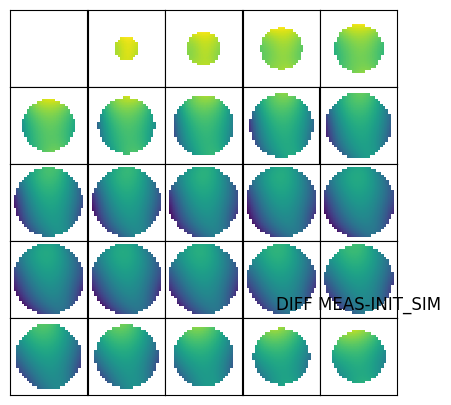

In [12]:
# measured - expected:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine
Field_measured = b0map_iter1.interpolatedField

d = np.shape(coordinate_grid[0])
print(d[0])

print(np.nanmax(Field_measured))
print(np.nanmax(MagnetsField_simulated))


MagnetsField_simulated_SCALED = MagnetsField_simulated #!!! TEMP

print((np.nanmax(Field_measured-MagnetsField_simulated_SCALED)-np.nanmin(Field_measured-MagnetsField_simulated_SCALED))/np.nanmean(Field_measured)*1e6,'PPM')

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(Field_measured[i+j*mapsize,:,:]-MagnetsField_simulated_SCALED[i+j*5,:,:],clim=[np.nanmin(Field_measured-MagnetsField_simulated_SCALED),np.nanmax(Field_measured-MagnetsField_simulated_SCALED)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('DIFF MEAS-INIT_SIM')

plt.savefig('./pics/DIFF_MEAS-INIT_SHIMS.png',format="png")
plt.savefig('./pics/DIFF_MEAS-INIT_SHIMS.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

(30, 30, 30, 3, 84)


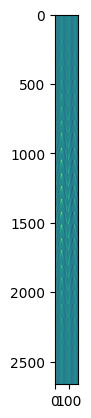

In [13]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
# DSV = b0map.path.radius*2 # DEFINED ABOVE!
b0map = b0map_iter1

DSV_INNER = b0map.path.radius*1.85 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields =magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #


In [14]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

(2664, 168)
(168,)
(2664,)


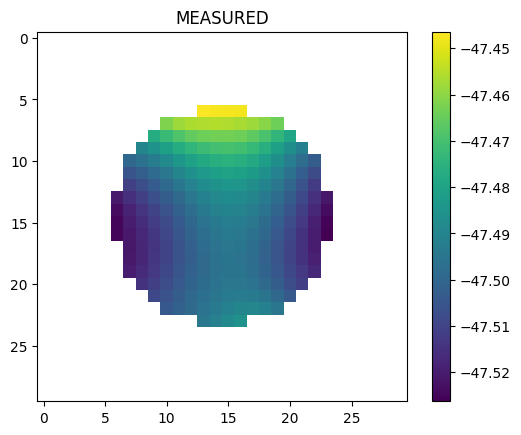

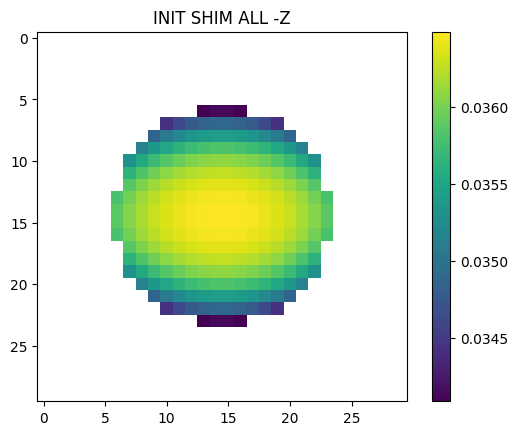

(2664,)
(30, 30, 30)


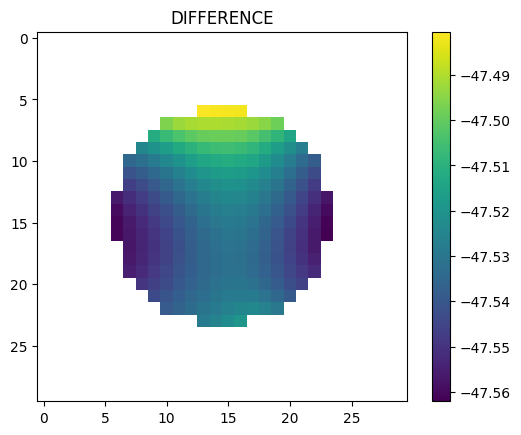

In [15]:
plt.imshow(Field_measured[3,:,:])
plt.title('MEASURED')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated[3,:,:])
plt.title('INIT SHIM ALL -Z')
plt.colorbar()
plt.show()
plt.imshow(Field_measured[3,:,:]-1*MagnetsField_simulated[3,:,:])
plt.colorbar()
plt.title('DIFFERENCE')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [16]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked*1.00,stackedRotationVector)+initialFieldMasked


            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

[0.00000000e+00 1.86490977e-24 3.04562878e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+00 1.86490977e-24 3.04562878e-08]
[ 0.00000000e+00  3.04562878e-08 -4.78600021e-20]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -4.78600021e-20]
[ 0.00000000e+00  3.04562878e-08 -8.70833976e-20]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -8.70833976e-20]
[ 0.00000000e+00  3.04562878e-08 -1.90362655e-19]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -1.90362655e-19]
[ 0.00000000e+00  3.04562878e-08 -4.74096583e-19]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -4.74096583e-19]
[ 0.00000000e+00  3.04562878e-08 -4.79875866e-17]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -4.79875866e-17]
[ 0.00000000e+00 -3.44545856e-09  3.02607713e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00 -3.44545856e-09  3.02607713e-08]
[ 0.00000000e+00 -2.26596323e-08  2.03500990e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! 

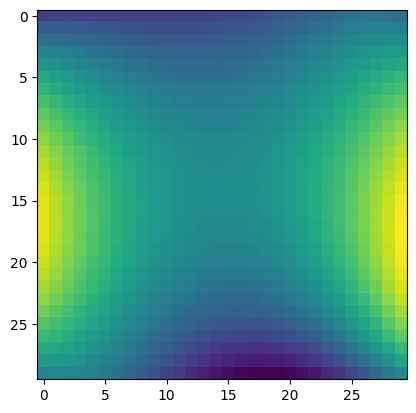

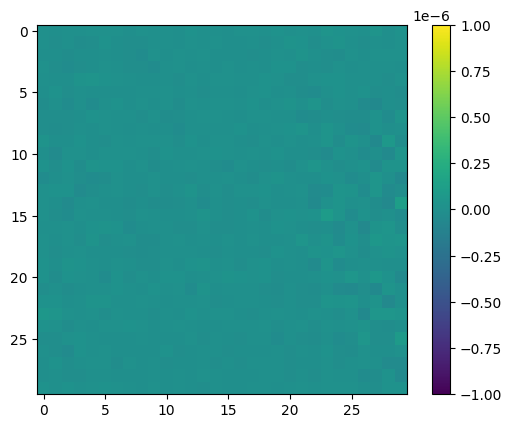

In [17]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter2_1ring.npy')
shimming_magnets[0].render_field(coordinate_grid)
shimFieldRendered = shimming_magnets[0].B0*0

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    magnet.bRem = NEW_B_REM # T
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0
    
shimFieldRendered*=1e3#e3*NEW_B_REM

optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))


plt.imshow(shimFieldRendered[6,:,:,2])
plt.show()
plt.imshow(optimized_shim_Field[6,:,:]-shimFieldRendered[6,:,:,2],vmin=-1e-6,vmax=1e-6)
plt.colorbar()
plt.show()


In [18]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('optIter2_1ring.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+3*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-7,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


1937224.7805479183
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6317e+09                                    1.76e+09    
       1              2         2.6769e+08      1.36e+09       2.07e+00       2.86e+08    
       2              3         1.1267e+08      1.55e+08       2.08e+00       4.88e+07    


C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


       3              5         9.9488e+07      1.32e+07       7.45e-01       9.08e+06    
       4              6         9.5334e+07      4.15e+06       1.47e+00       1.43e+07    
       5              7         9.5018e+07      3.16e+05       1.36e-01       7.37e+06    
       6              8         9.3751e+07      1.27e+06       1.30e+00       1.56e+07    
       7              9         9.2412e+07      1.34e+06       1.48e+00       1.24e+07    
       8             10         9.1140e+07      1.27e+06       1.24e+00       6.58e+06    
       9             11         9.0638e+07      5.02e+05       7.91e-01       1.04e+07    
      10             12         9.0424e+07      2.14e+05       1.14e-01       4.40e+06    
      11             13         9.0250e+07      1.74e+05       4.51e-01       6.19e+06    
      12             14         9.0175e+07      7.46e+04       7.43e-02       3.64e+06    
      13             15         9.0061e+07      1.15e+05       2.61e-01       3.42e+06    

In [19]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter2_1ring.npy',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))
#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM
    #pos = positions[idx]
    #magnet.position = positions[idx]
    #magnet.update_rotation(rotation_yz=alpha+0*np.pi/2)
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))
#print(np.shape(optimizedField))



shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[360.         360.         360.         360.         360.
  57.40255024  52.44204416  39.92362829  40.66063616  52.03989914
 100.51471637 141.56501558 148.43308352 144.94857969  78.72502784
 359.93525664 351.70054756 331.33769336 316.96706054 305.10724388
 294.42821786 261.87511373 252.56427578 243.37030382 234.31150554
 225.42670201 216.78683985 208.49002403 184.85354075 177.15900302
 163.99462875 148.37915809 136.44227141 127.33089992 119.45329052
  95.61411643  88.82036681  82.14449567  75.6105618   69.24666201
  63.13534541  57.42256495 360.         360.          83.53467964
 122.74809502 139.77238175 143.89294874 143.43543453 135.45846211
 133.80616461 133.12055686 133.62651112 135.3972517  138.22183017
 141.50055876 143.99889455 360.         360.         110.2003784
 360.         360.         359.51225066 314.69616909 304.47736688
 294.59580698 284.92955116 275.4509859  266.18587265 257.17716638
 229.38930529 221.72109668 213.81984472 203.79565904 178.85762426
  85.65490275  62.4

30


<Figure size 640x480 with 0 Axes>

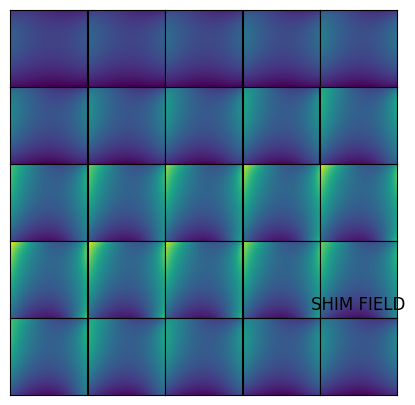

In [20]:
# SHIM FIELD
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine

shimoffset = 0# np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(optimized_shim_Field[i+j*mapsize,:,:],clim=[1.00*np.nanmin(optimized_shim_Field)+shimoffset,1.00*np.nanmax(optimized_shim_Field)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIM FIELD')

plt.savefig('./pics/shim_field_ITER2_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER2_1RING.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()



30
shimmed simulated HOMO,ppm: 2397.5028943232574


<Figure size 640x480 with 0 Axes>

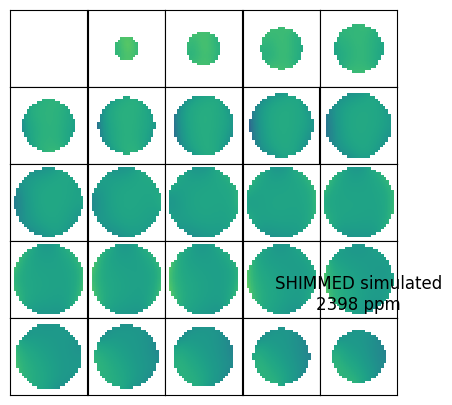

In [21]:
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine


shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimmed_Field_final = initialField+optimized_shim_Field
homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


0.25634002592118954 -0.04347172771726347 359.99999999999994
0.25837121755087095 -0.029057080742575094 359.99999999999994
0.2595924850253051 -0.01455134764847503 359.99999999999994
0.26 0.0 359.99999999999994
0.2595924850253051 0.014551347648475035 359.99999999999994
0.25837121755087095 0.029057080742575105 57.40255024342835
0.25634002592118954 0.04347172771726347 52.44204415746386
0.24373283831314335 0.09052239241104448 39.9236282922693
0.23828457837705758 0.10402143869254984 40.66063616168287
0.23208936048768317 0.11719440578977419 52.03989913820505
0.22516660498395408 0.12999999999999998 100.51471636526708
0.21753801283920812 0.14239807923553086 141.56501558248542
0.2092274976344825 0.1543497788583211 148.43308351507386
0.20026111059587987 0.16581763351014503 144.94857969001762
0.16581763351014503 0.20026111059587987 78.72502784127197
0.1543497788583211 0.2092274976344825 359.9352566373299
0.14239807923553086 0.21753801283920812 351.7005475637598
0.13000000000000003 0.225166604983954

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

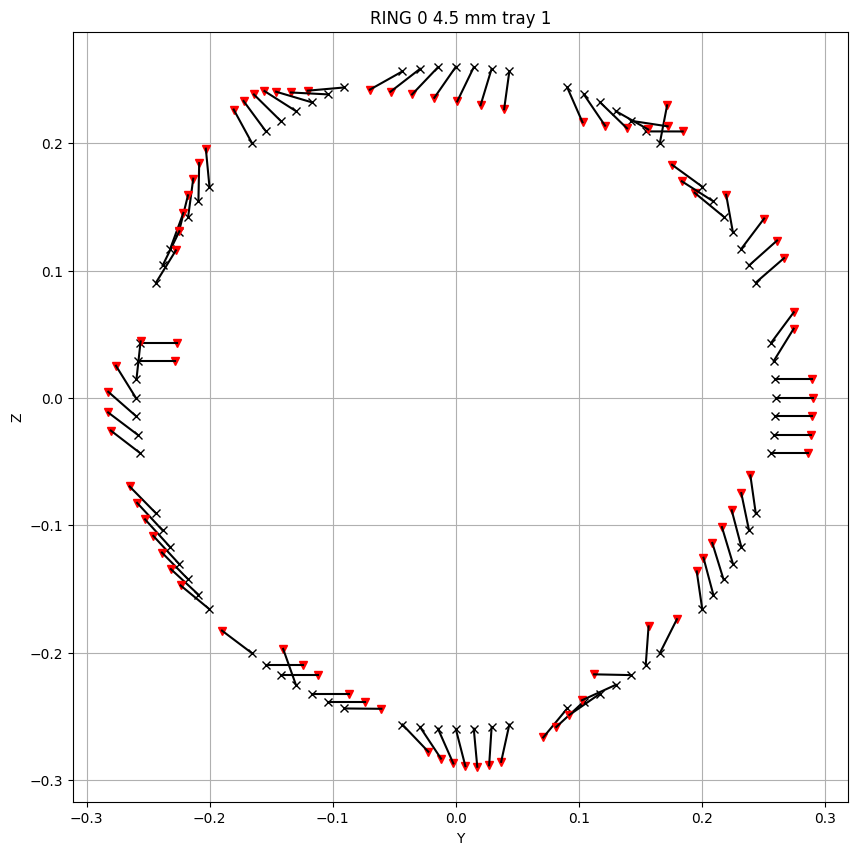

In [31]:
# MAGNET ROTATIONS RING 0
#plotting rotations

ring_number = 0

plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ringPosition = ringPositions[ring_number]
plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
rdisp = 3e-2 # length of displayed rotation vector 
for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx] # !!!+
        print(tmppos[1],tmppos[2],angle*180/np.pi)
        axes.plot(tmppos[1],tmppos[2],'xk')
        direction = [rdisp*np.cos(angle),rdisp*np.sin(angle)]
        axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
        axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')
        

plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [23]:
#?--- REALITY
#? --- REAL MAP RECORDED ---

In [32]:
# --- REALITY IS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map

import numpy as np  
import b0
b0map_test_ring_reality = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/240828_onering_from_thursday_ball_R120_12pts_bvals_shigt.csv'
b0map_test_ring_reality.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
b0map_test_ring_reality.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/240828_onering_from_thursday_ball_R120_12pts_bvals_shigt.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/240828_onering_from_thursday_ball_R120_12pts,,,,,,
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |

c:\cosi-measure\Software\COSI2\b0.py:302: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,0])>1.25:


b0 importer: warning! 0 VALUE detected! pt 6206, assigning [-47.412      -1.01        0.864      47.4306266]
0.0 is too low! assigning [-47.412      -1.01        0.864      47.4306266] !!!
assigned:  [-47.412      -1.01        0.864      47.4306266] <-----
b0 importer: warning! 0 VALUE detected! pt 6577, assigning [-47.524       -1.077        0.72        47.54165442]
0.0 is too low! assigning [-47.524       -1.077        0.72        47.54165442] !!!
assigned:  [-47.524       -1.077        0.72        47.54165442] <-----
b0 importer: warning! 0 VALUE detected! pt 6869, assigning [-47.531       -1.045        0.74        47.54824483]
0.0 is too low! assigning [-47.531       -1.045        0.74        47.54824483] !!!
assigned:  [-47.531       -1.045        0.74        47.54824483] <-----
b0 importer: warning! 0 VALUE detected! pt 6965, assigning [-47.479       -1.105        0.677       47.49668194]
0.0 is too low! assigning [-47.479       -1.105        0.677       47.49668194] !!!
assigned

In [33]:
# spherical decomposition
diameter_of_sphere = b0map_test_ring_reality.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_test_ring_reality.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_test_ring_reality.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


240.00000000000017
(25, 25, 25)
Mean field strength in 24 cm sphere: -47.50 mT
Inhomogeneity in 24 cm sphere: -6484 ppm
Inhomogeneity of fit: 5376 ppm
Error: -3828 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 5115 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


-47.49676576175876
-47.61213544282229 -47.3691667610626


<Figure size 640x480 with 0 Axes>

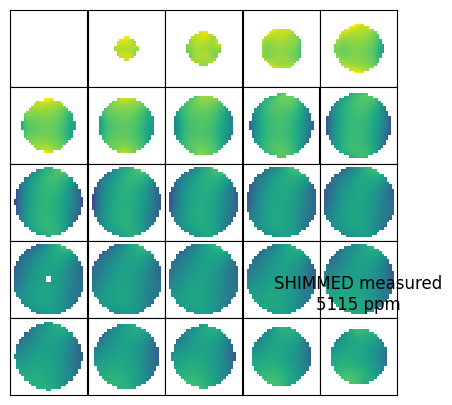

In [34]:
# REAL field (interpolated)
# save REAL field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_test_ring_reality.xDim_SPH_fine
ShimmedFieldMeasured = b0map_test_ring_reality.interpolatedField
mapsize = int(np.sqrt(len(ShimmedFieldMeasured[:,0,0])))

shimoffset = np.nanmean(ShimmedFieldMeasured)-np.nanmean(FieldMeasured)

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(ShimmedFieldMeasured))

print(np.nanmin(ShimmedFieldMeasured),np.nanmax(ShimmedFieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(ShimmedFieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured)+shimoffset,np.nanmax(FieldMeasured)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)

measuredHomo = abs((np.nanmax(ShimmedFieldMeasured)-np.nanmin(ShimmedFieldMeasured))/np.nanmean(ShimmedFieldMeasured)*1e6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED measured\n%.0f ppm'%measuredHomo)

plt.savefig('./pics/iter2_onering_real_field.png',format="png")
plt.savefig('./pics/iter2_onering_real_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

30
6.283185307179585
[ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
6.283185307179585
[ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
6.283185307179585
[ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
6.283185307179585
[ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
6.283185307179585
[ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [ 0.00000000e+00  3.04562878e-08 -3.45102566e-23]
1.0018635007892973
[0.0000000e+00 1.6407816e-08 2.5658703e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.0000000e+00 1.6407816e-08 2.5658703e-08]
0.915286337024
[0.00000000e+00 1.85650447e-08 2.41438311e-08]
1.771875
!!!!!!!!!!!!!!!!!!!!!! [0.00000000e+0

<Figure size 640x480 with 0 Axes>

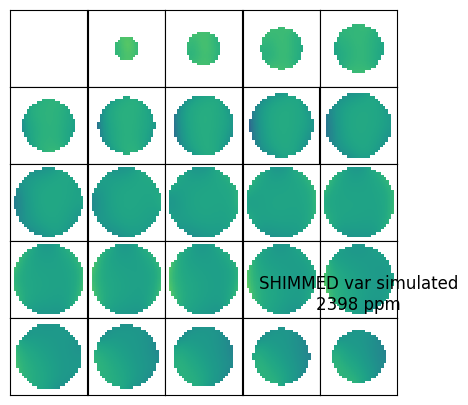

In [38]:
# now lets get the measured field with the simulation using the rotations and varying the strength
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM*1
    pos = positions[idx]
    magnet.position = [pos[0],pos[1],pos[2]]
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimmed_Field_final = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


#!!!!!!!!!!!!

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED var simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

 

In [28]:
# difference between measured shimmed and intial
diff_measured_field = shimmed_Field_final-ShimmedFieldMeasured
plt.figure(0)

mapsize = int(np.sqrt(len(diff_measured_field[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

g=3e-2

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(diff_measured_field[i+j*mapsize,:,:],clim=[-g,g])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('VARSIM - REALMEAS')

plt.savefig('./pics/diff_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/diff_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()



ValueError: operands could not be broadcast together with shapes (30,30,30) (31,31,31) 